<a href="https://colab.research.google.com/github/angierm123/Advertising/blob/main/Wine_and_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Wine Quality and Student Performance Analysis

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load the wine quality dataset
wine = pd.read_csv("winequality-red.csv")

In [ ]:
# Q1: Key Features of the Wine Dataset
print("\nQ1: Key Features\n")
print(wine.describe())
print("\nCorrelación con la calidad:\n", wine.corr()['quality'].sort_values(ascending=False))


Q1: Key Features

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000           

The wine quality dataset contains physicochemical variables of red or white wine samples. These features include:

- Fixed Acidity: Tartaric and malic acids that do not evaporate easily. It influences the wine's stability and taste.

- Volatile Acidity: Acetic acid concentration. High levels produce an unpleasant vinegar taste.

- Citric Acid: Adds freshness and flavor. Moderate levels can enhance quality.

- Residual Sugar: Sugar left after fermentation. It affects sweetness and body.

- Chlorides: Indicates salt content. High levels may negatively affect taste.

- Free Sulfur Dioxide: Prevents microbial growth and oxidation. Excessive levels can cause off-flavors.

- Total Sulfur Dioxide: Sum of free and bound SO₂. Regulatory limits apply.

- Density: Related to sugar and alcohol concentration.

- pH: Measures acidity/alkalinity. It influences taste and microbial stability.

- Sulphates: Contribute to the wine’s preservation and bitterness.

- Alcohol: Higher alcohol levels generally correlate with higher quality.

Importance: Features like alcohol, volatile acidity, and sulphates tend to be most influential in predicting wine quality, based on correlation analysis and feature importance from machine learning models.



In [ ]:
# Q2: Handling Missing Data
print("\nQ2: Handling Missing Data\n")
print(wine.isnull().sum())
# No missing data, but if was the case:
#wine['feature'] = wine['feature'].fillna(wine['feature'].mean())


Q2: Handling Missing Data

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In this dataset, there were no missing values. However, in practice, if there were missing values, common imputation methods include:

- Mean/Median/Mode Imputation: Replace missing values with the mean, median, or mode of the column.

- Advantage: Simple and fast.

- Disadvantage: Can reduce variability and distort data distribution.

- KNN Imputation: Uses feature similarity to predict missing values.

- Advantage: More accurate if features are correlated.

- Disadvantage: Computationally expensive and sensitive to outliers.

- Model-based Imputation: Predict missing values using regression or decision trees.

- Advantage: More intelligent imputation.

- Disadvantage: Requires training and validation.

- Dropping Missing Rows: Sometimes done if missing data is minimal.

- Advantage: Easy and preserves original distribution.

- Disadvantage: Risk of losing valuable data.

In [ ]:
# Q5: EDA and Transformations
print("\nQ5: Exploratory Data Analysis\n")


Q5: Exploratory Data Analysis



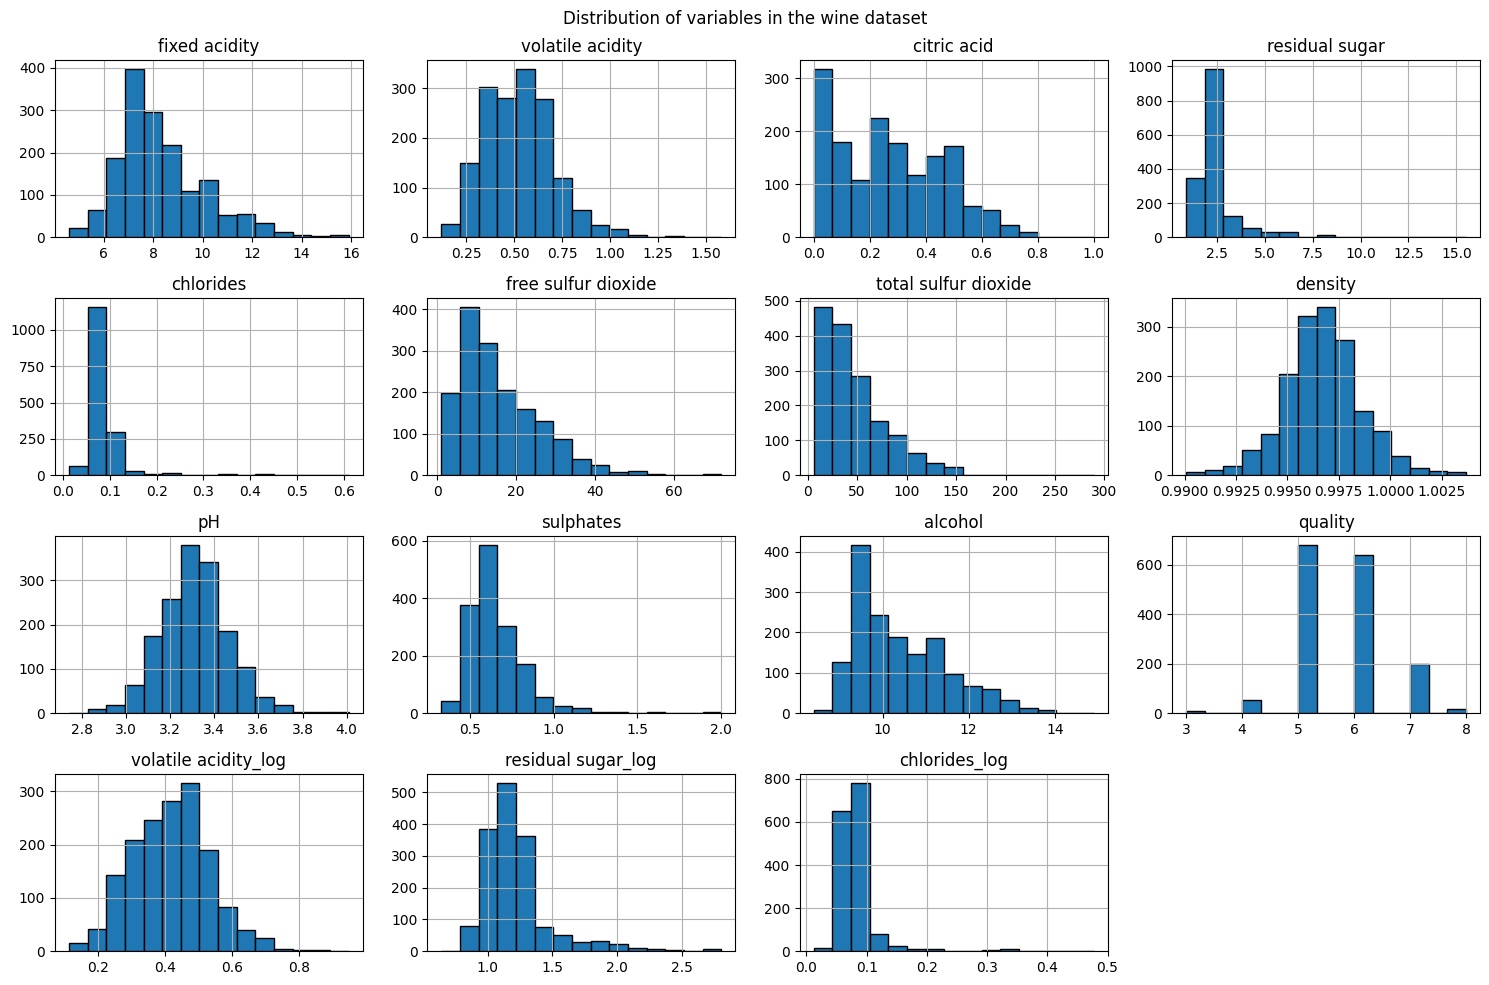

In [ ]:
# Display histograms of all variables
wine.hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.suptitle("Distribution of variables in the wine dataset")
plt.tight_layout()
plt.show()

- Fixed Acidity

Not normally distributed, slightly skewed to the right.

Correction: Log or square root transformation.

- Volatile Acidity

Not normally distributed, mildly right-skewed.

Correction: Log transformation.

- Citric Acid

Not normally distributed, right-skewed.

Correction: Log or square root transformation.

- Residual Sugar

Not normally distributed, heavily skewed to the right.

Correction: Log transformation.

- Chlorides

Not normally distributed, strongly right-skewed.

Correction: Log transformation.

- Free Sulfur Dioxide

Not normally distributed, right-skewed.

Correction: Log or square root transformation.

- Total Sulfur Dioxide

Not normally distributed, right-skewed.

Correction: Log transformation.

- Density

Approximately normally distributed, no significant skew.

Correction: None needed.

- pH

Approximately normally distributed, no significant skew.

Correction: None needed.

- Sulphates

Not normally distributed, skewed to the right.

Correction: Log or square root transformation.

- Alcohol

Not normally distributed, moderately right-skewed.

Correction: Log transformation.

- Quality

Not normally distributed, this is a discrete ordinal variable.

Correction: No correction needed; used as is for classification or regression.

In [ ]:
# Check for normality (using the skewness and kurtosis method as an alternative)
for col in ['volatile acidity', 'residual sugar', 'chlorides']:
    skewness = wine[col].skew()
    kurtosis = wine[col].kurtosis()
    print(f"{col} - Skewness: {skewness:.2f}, Kurtosis: {kurtosis:.2f}")

volatile acidity - Skewness: 0.67, Kurtosis: 1.23
residual sugar - Skewness: 4.54, Kurtosis: 28.62
chlorides - Skewness: 5.68, Kurtosis: 41.72


In [ ]:
# Logarithmic transformation to skewed variables
for col in ['volatile acidity', 'residual sugar', 'chlorides']:
    wine[f'{col}_log'] = np.log1p(wine[col])  # log1p evita log(0)

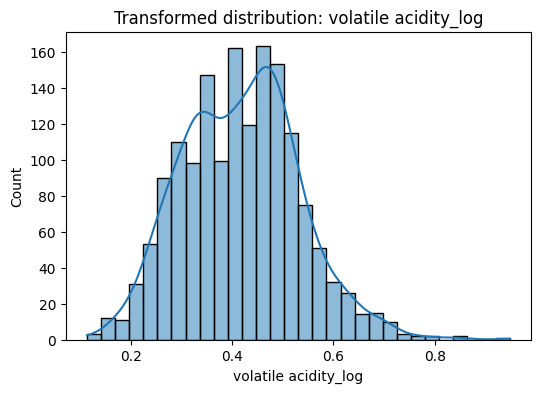

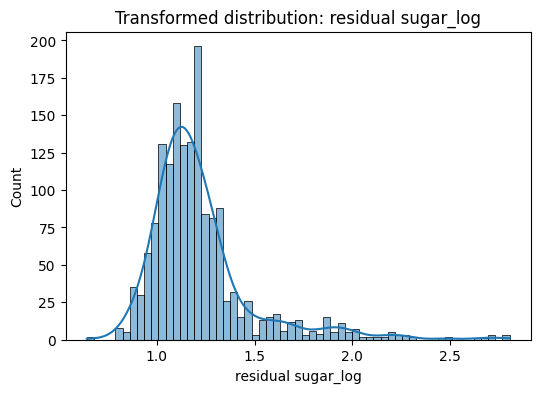

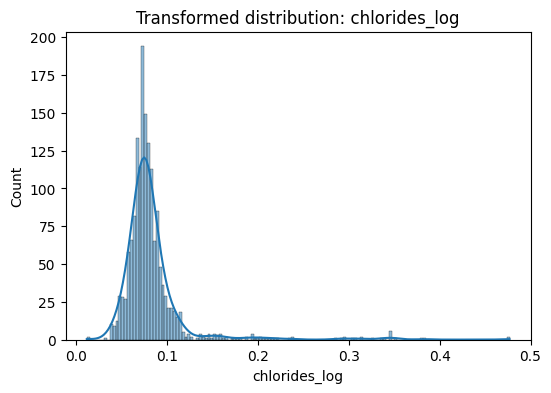

In [ ]:
# View transformed variables
for col in ['volatile acidity_log', 'residual sugar_log', 'chlorides_log']:
    plt.figure(figsize=(6, 4))
    sns.histplot(wine[col], kde=True)
    plt.title(f"Transformed distribution: {col}")
    plt.show()

1. Volatile Acidity (log-transformed)
The distribution is nearly symmetrical and bell-shaped after the log transformation.The log transformation was successful in normalizing the data. This feature is now well-suited for statistical analysis and machine learning models.

2. Residual Sugar (log-transformed)
The distribution is still right-skewed, although improved compared to the original.The log transformation reduced extreme skewness, but the data remains moderately skewed. Further transformation (e.g., Box-Cox) could be explored if perfect normality is needed.

3. Chlorides (log-transformed)
The distribution shows a sharp peak and a long right tail, indicating strong skewness remains.The log transformation had limited effect. The variable is still highly skewed, and alternative methods or more robust models may be needed to handle it.


In [ ]:
# Load student performance dataset
students = pd.read_csv("StudentsPerformance.csv")

In [ ]:
# Q3: Analysis of factors affecting performance
print("\nQ3: Student Performance Factors\n")
print(students.head())
print(students.describe())


Q3: Student Performance Factors

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169

Key factors include:

- Study time

- Parental education level

- Gender

- Lunch (nutritional status)

- Test preparation course

- School support

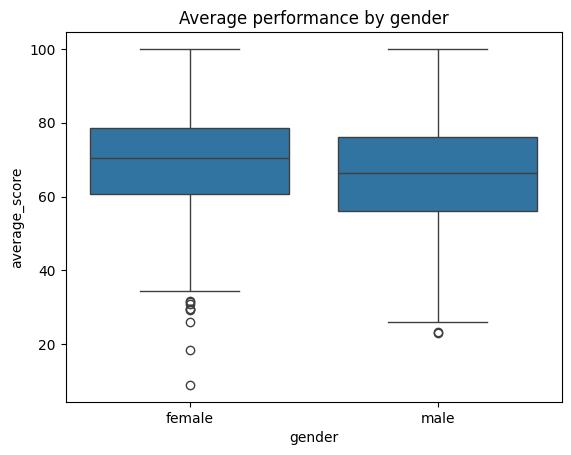

In [ ]:
# How would you go about analyzing these factors using statistical techniques?

# Correlations
students['average_score'] = students[['math score', 'reading score', 'writing score']].mean(axis=1)
sns.boxplot(data=students, x='gender', y='average_score')
plt.title("Average performance by gender")
plt.show()


The boxplot compares the average exam performance between female and male students.

- Females show a slightly higher median average score compared to males.

- The interquartile range (IQR) is similar for both groups, indicating comparable variability.

- There are more outliers among female students with low scores, but both genders show a similar maximum.

Overall, female students tend to perform slightly better on average in this dataset.Gender appears to have a slight influence on average academic performance, with females achieving marginally higher average scores.

In [ ]:
# Q4: Feature Engineering
print("\nQ4: Feature Engineering\n")
students_encoded = pd.get_dummies(students.drop(['average_score'], axis=1), drop_first=True)
scaler = StandardScaler()
students_encoded[['math score', 'reading score', 'writing score']] = scaler.fit_transform(
    students_encoded[['math score', 'reading score', 'writing score']]
)
print(students_encoded.head())



Q4: Feature Engineering

   math score  reading score  writing score  gender_male  \
0    0.390024       0.193999       0.391492        False   
1    0.192076       1.427476       1.313269        False   
2    1.577711       1.770109       1.642475        False   
3   -1.259543      -0.833899      -1.583744         True   
4    0.653954       0.605158       0.457333         True   

   race/ethnicity_group B  race/ethnicity_group C  race/ethnicity_group D  \
0                    True                   False                   False   
1                   False                    True                   False   
2                    True                   False                   False   
3                   False                   False                   False   
4                   False                    True                   False   

   race/ethnicity_group E  parental level of education_bachelor's degree  \
0                   False                                           True  

- Handling categorical variables:Used pd.get_dummies() to convert categorical variables like gender, lunch, and test preparation course into numerical format.

- Scaling numeric features:Applied StandardScaler to math score, reading score, and writing score.

- Creating new features:Created an average_score variable from the mean of the three subject scores.

- Selection:Chose features based on correlation and data understanding.

This preprocessing ensures that the dataset is clean, numeric, and ready for model training.